<a href="https://colab.research.google.com/github/Aman811630/Mobile-Price-Range-Prediction---ML-project/blob/main/Classification_ML_Project_Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Mobile Price Range Prediction


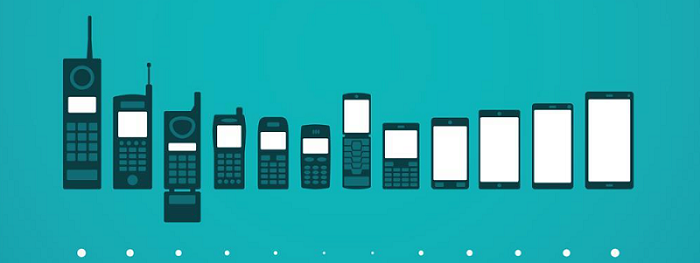

##### **Project Type**    - **Classification**
##### **Contribution**    - **Individual**
##### **Name**           - **Aman** Singh


# **Project Summary -**

Today Electronic market is on the boost and it is that type of market which is ever growing , in electronics various types of product are present like mobile ,its accessories , television , gadgets etc. Mobile now a days is compulsory   in day today life and its neccesity of the era.
In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **GitHub Link -**

https://github.com/Aman811630/Mobile-Price-Range-Prediction---ML-project

# **Problem Statement**


 The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [160]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [161]:
# Load Dataset
#importing dataset from my drive


In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
file_path="/content/drive/MyDrive/data_mobile_price_range.csv"

In [164]:
mobile_price_range_df=pd.read_csv("/content/drive/MyDrive/data_mobile_price_range.csv")


### Dataset First View

In [165]:
# Dataset First Look

mobile_price_range_df.head(5)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [166]:
mobile_price_range_df.tail(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [167]:
# Dataset Rows & Columns count
mobile_price_range_df.shape

(2000, 21)

We have 2000 rows and 21 columns in our mobile_price_range_ddf dataset.

### Dataset Information

In [168]:
# Dataset Info

mobile_price_range_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## ***2. Understanding Your Variables***

In [169]:
# Dataset Columns

mobile_price_range_df.columns


Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Variable Description

### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of

   0(low cost),

   1(medium cost),

   2(high cost) and
   
   3(very high cost).

* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [170]:
# Dataset Describe

mobile_price_range_df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


Their is some issue in the dataset columns like screen width (sc_w) practically  minum value can not be 0 and also same for pixel height ().
we have to clear this issue so...

In [171]:
# Making copy of data

df=mobile_price_range_df.copy()


In [172]:
# replacing the 0 value with mean value
#where ther is sc_W and px_height is zero ,assigning mean values

df.sc_w[df[df.sc_w == 0].index] = df.sc_w.mean()

df.px_height[df[df.px_height == 0].index] = df.px_height.mean()

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.518500,439.418206,501.0,851.75,1226.000,1615.25,1998.0
blue,2000.0,0.495000,0.500100,0.0,0.00,0.000,1.00,1.0
clock_speed,2000.0,1.522250,0.816004,0.5,0.70,1.500,2.20,3.0
dual_sim,2000.0,0.509500,0.500035,0.0,0.00,1.000,1.00,1.0
fc,2000.0,4.309500,4.341444,0.0,1.00,3.000,7.00,19.0
four_g,2000.0,0.521500,0.499662,0.0,0.00,1.000,1.00,1.0
int_memory,2000.0,32.046500,18.145715,2.0,16.00,32.000,48.00,64.0
m_dep,2000.0,0.501750,0.288416,0.1,0.20,0.500,0.80,1.0
mobile_wt,2000.0,140.249000,35.399655,80.0,109.00,141.000,170.00,200.0
n_cores,2000.0,4.520500,2.287837,1.0,3.00,4.000,7.00,8.0


Now its good to go


#### Duplicate Values

In [174]:
# Dataset Duplicate Value Count

#checking whether there is duplicates or not

len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [175]:
# Missing Values/Null Values Count

null_values=df.isnull().sum()
null_values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Text(0.5, 1.0, 'Visualising Missing Values')

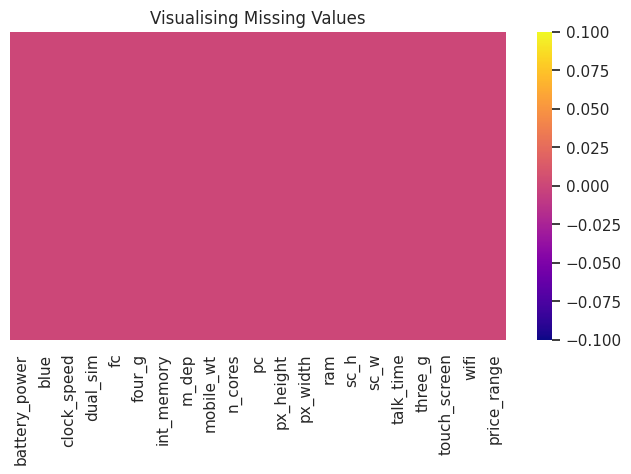

In [176]:
# Visualizing the missing values

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title("Visualising Missing Values")

Observation :-

NO null/ missing values present in the mobile_price_range_df dataset.

### Check Unique Values for each variable.

In [177]:
# Check Unique Values for each variable.


df.nunique()               #The nunique () method returns the number of unique values for each column



battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### What did you know about your dataset?

Our mobile_price_range_df dataset have 2000 rows and 21 columns with No

*   No or  Zero duplcate and missing/null values presents.

* We don't have any object data type in our data set.

* Price_range is our target variable.

  





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: >

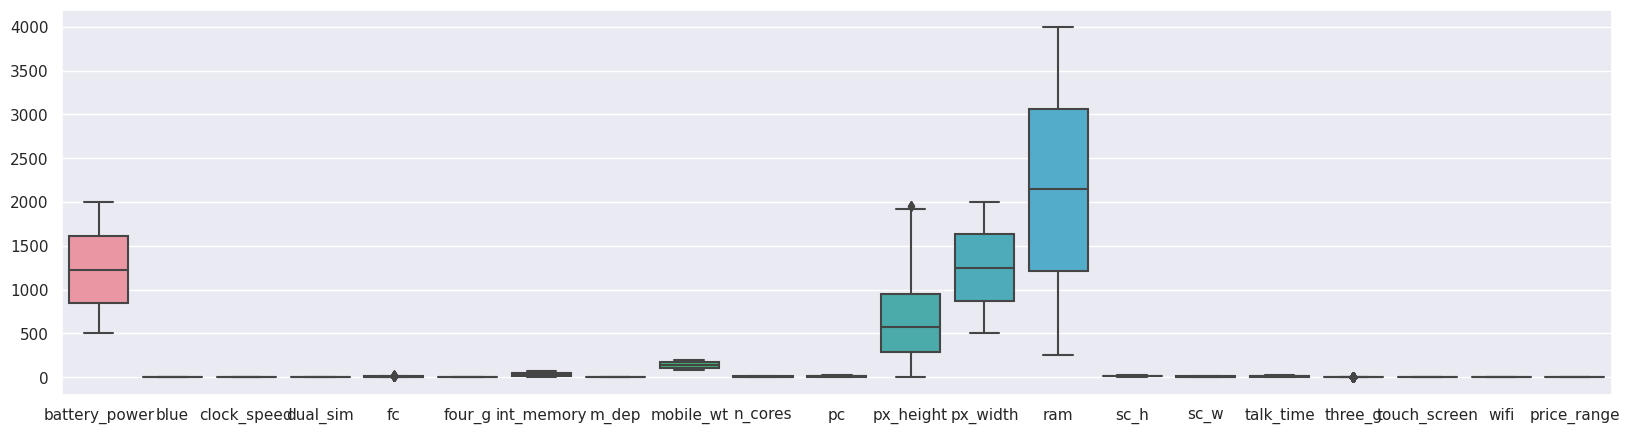

In [178]:
plt.figure(figsize=(20,5))
sns.boxplot(df)

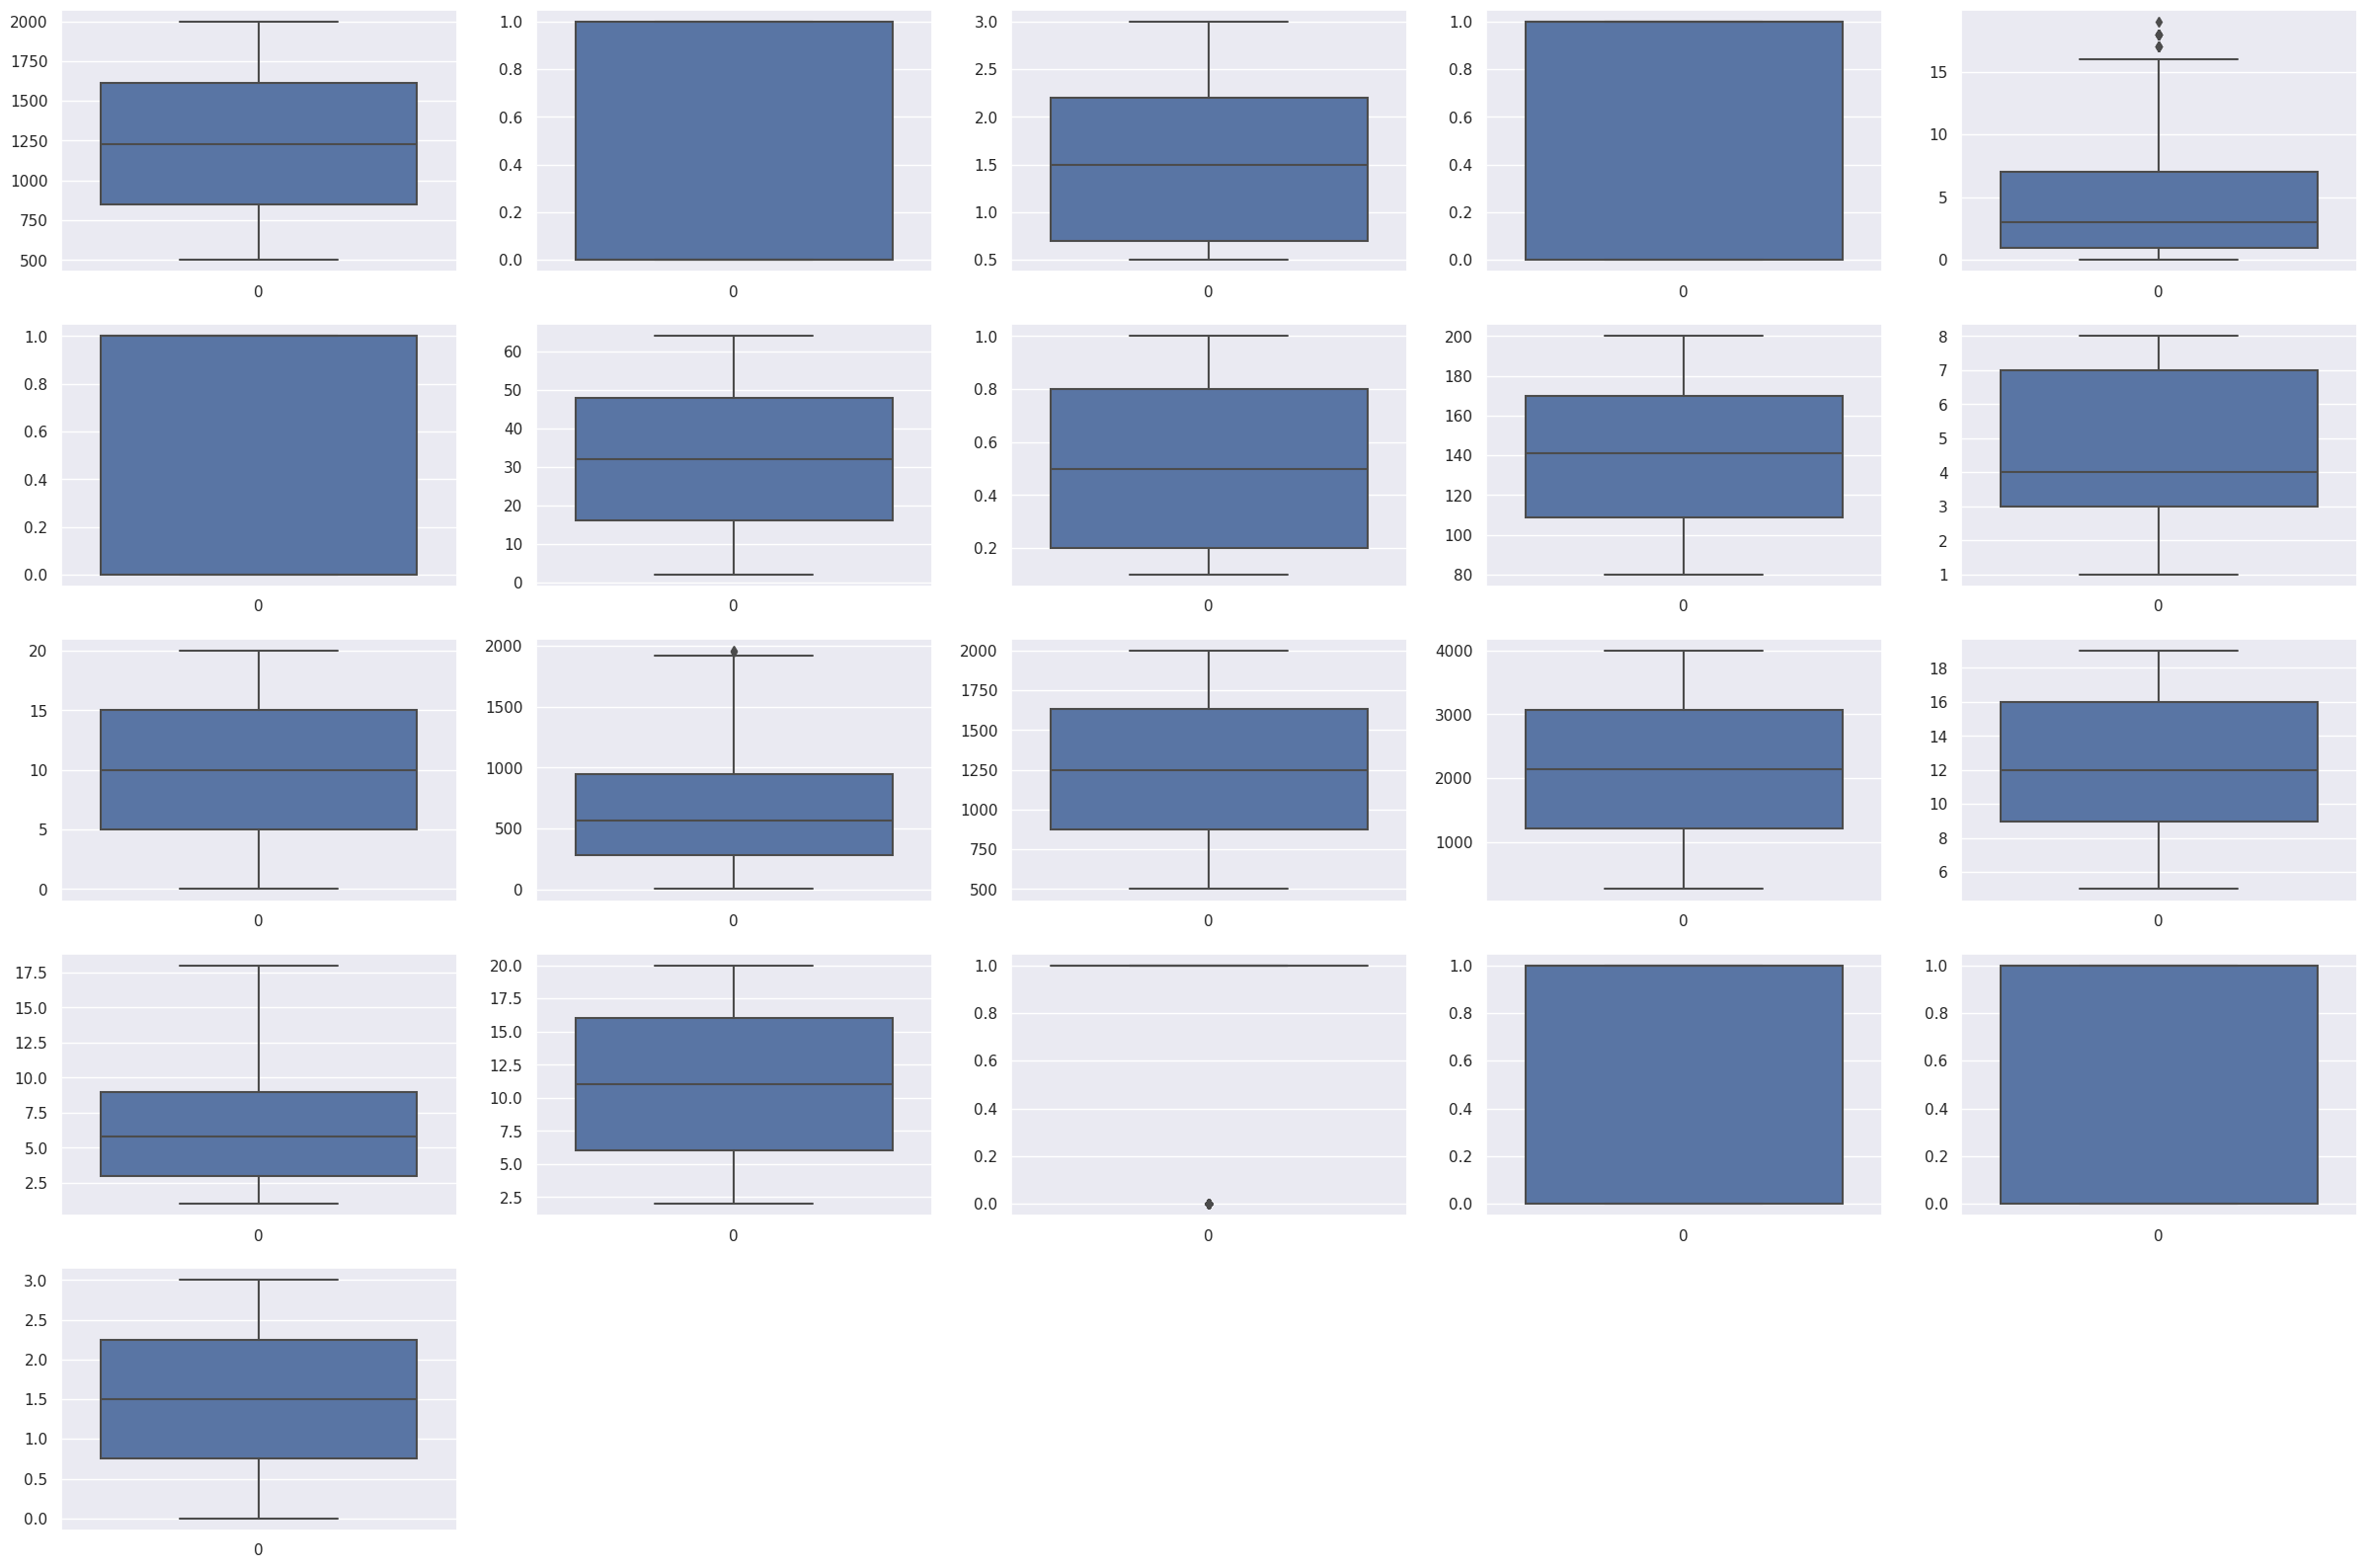

In [179]:
# looking for outliers using box plot

plt.figure(figsize=(30,20))
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
print("\n")

##### 1. Why did you pick the specific chart?

Boxplot is one of the best way to analyize the distribution of dataset and it can easily tell you abut otliers.

##### 2. What is/are the insight(s) found from the chart?

their is no much otliers presents in our dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Having no outliers in a dataset is a good and positive thing.

# `EDA Section `

Now we do visulization for different coulumns of dataset.

In [180]:
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2


#### Chart - 2

### `battery_power`

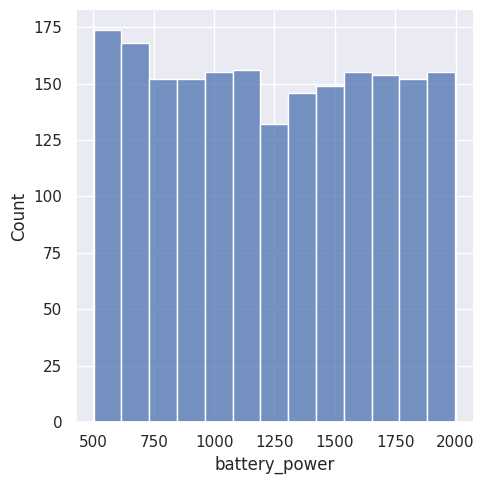

In [181]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(10,15)})
ax=sns.displot(df["battery_power"])
plt.show()

##### 1. Why did you pick the specific chart?

displot is best to do vizulization this type of data

##### 2. What is/are the insight(s) found from the chart?

This plot shows how the battery mAh is spread. there is a gradual increase as the price range increases



#### Chart - 3

### `Bluetooth`

<Axes: xlabel='blue', ylabel='price_range'>

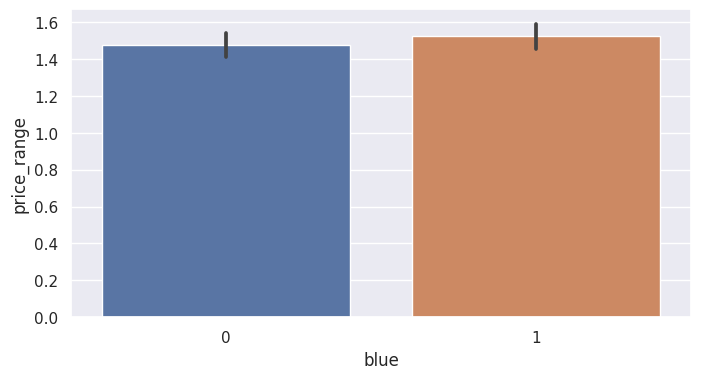

In [182]:
# Chart - 3 visualization code

#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,4))

sns.barplot(data=df,x='blue',y='price_range',ax=ax)



##### 1. Why did you pick the specific chart?

Barplot is good choice for showing quantit distribution.

##### 2. What is/are the insight(s) found from the chart?

The disribution of having bluethoth feature in phone is 50-50 (i.e) Half the devices have Bluetooth, and Half don’t.

#### Chart - 4

### `FC (front camera megapixels)`

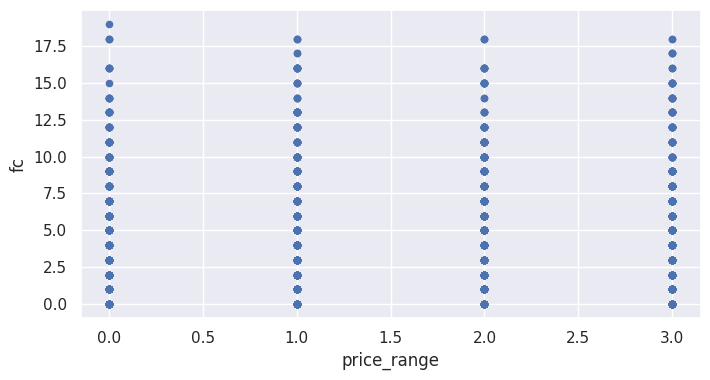

In [183]:
# Chart - 4 visualization code
fig,ax=plt.subplots(figsize=(8,4))
df.plot(x='price_range',y='fc',kind='scatter',ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?

In scatter plot distribution van be seen easily and more simple way.

##### 2. What is/are the insight(s) found from the chart?

* front camera megapixel features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

#### Chart - 5

`ram`

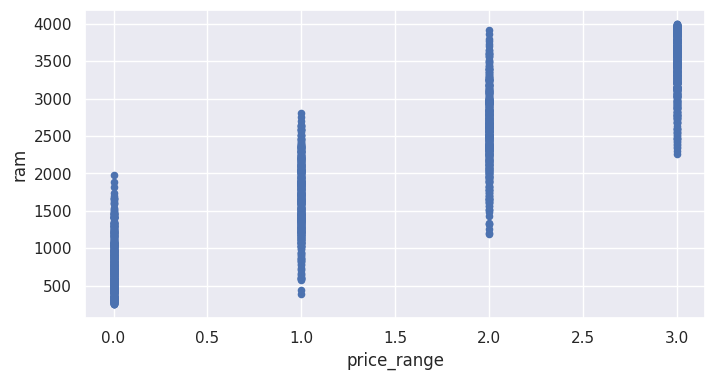

In [184]:
# Chart - 5 visualization code

fig,ax=plt.subplots(figsize=(8,4))

df.plot(x='price_range',y='ram',kind='scatter', ax=ax)
plt.show()

#####  What is/are the insight(s) found from the chart?

* Ram has continuous increase with price range while moving from Low cost to Very high cost.

#### Chart - 6

### `Pixel Width`

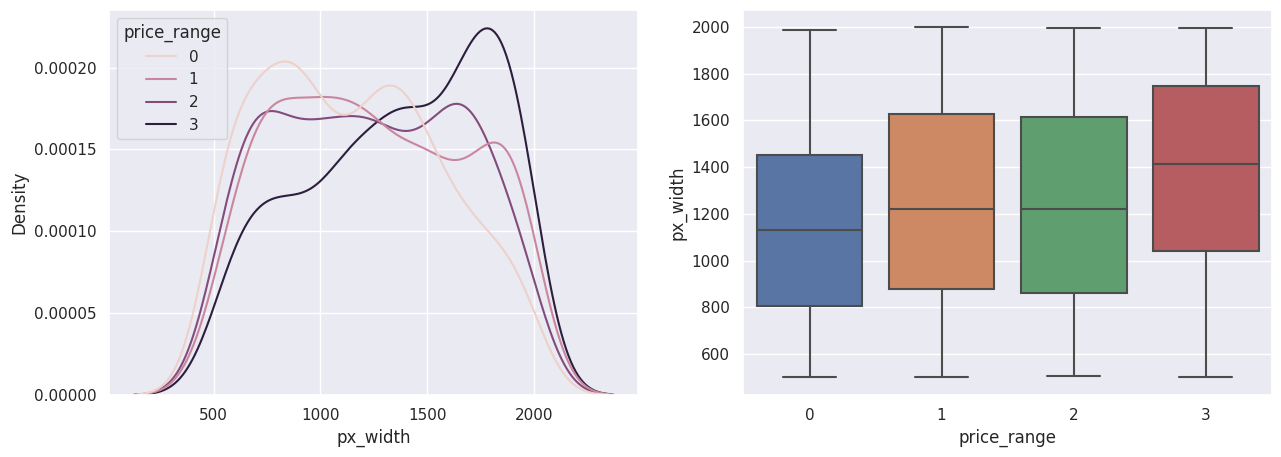

In [185]:
# Chart - 6 visualization code

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

#####  What is/are the insight(s) found from the chart?

* There is not a continuous increase in pixel width as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal pixel width, so we can say that it would be a driving factor in deciding price_range.

#### Chart - 7

### `Pixel hight`

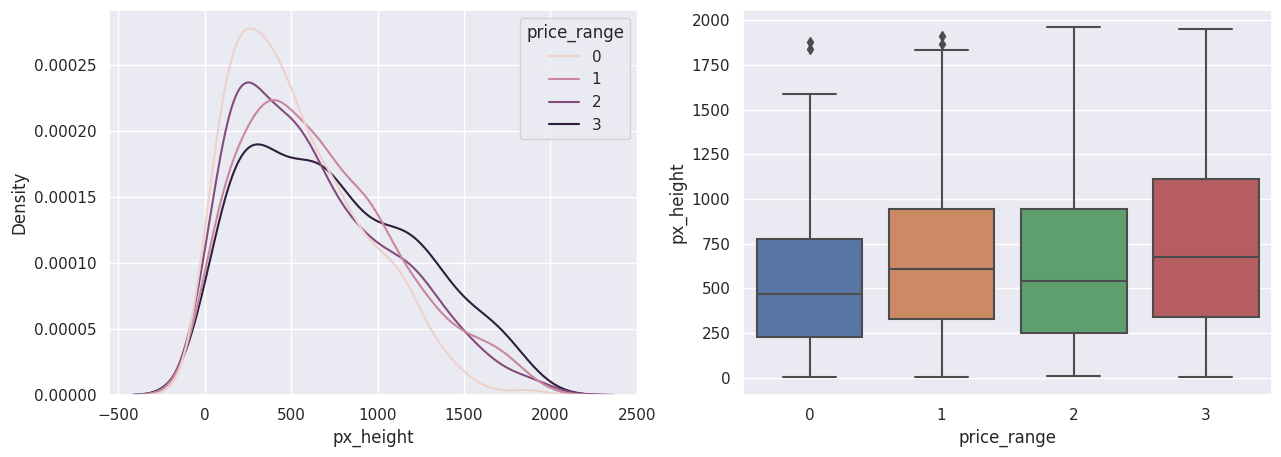

In [186]:
# Chart - 7 visualization code

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

#####  What is/are the insight(s) found from the chart?

* Pixel height is almost similar as we move from Low cost to Very high cost.little variation in pixel_height.

#### Chart - 8

`PC (Primary camera Megapixels)`

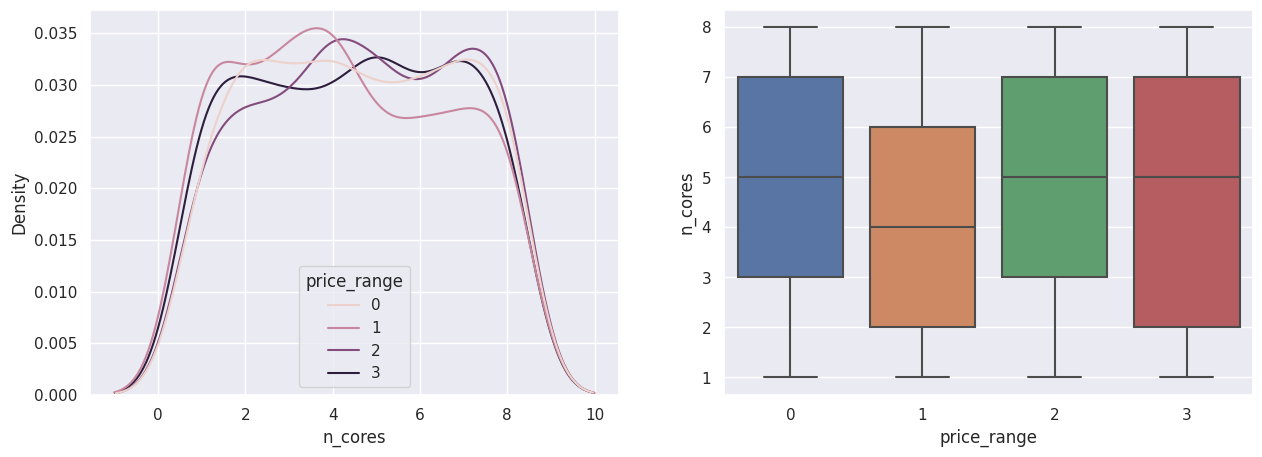

In [187]:
# Chart - 8 visualization code

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

#####  What is/are the insight(s) found from the chart?

* Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.


In [188]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905.0,1988,2631,17,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263.0,1716,2603,11,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216.0,1786,2769,16,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208.0,1212,1411,8,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222.0,1890,668,13,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915.0,1965,2032,11,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868.0,1632,3057,9,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336.0,670,869,18,10.0,19,1,1,1,0


In [189]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Chart - 9

`Mobile Weight`

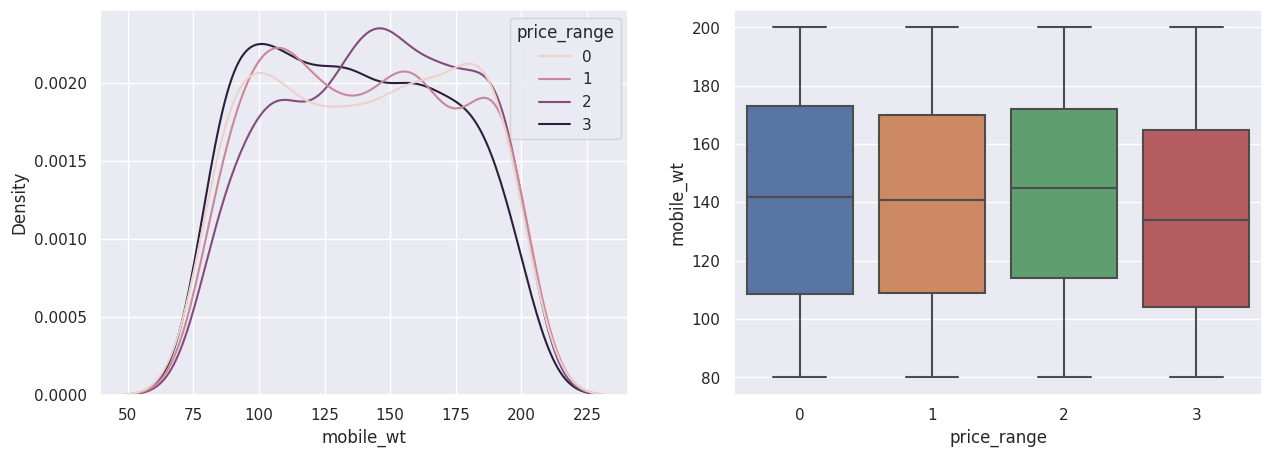

In [190]:
# Chart - 9 visualization code

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

#####  What is/are the insight(s) found from the chart?

* From the above graph we can see that costly phones are lighter.

#### Chart - 10

`screen_size`

In [191]:
# Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.

# Defining new variable sc_size

df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))
df['sc_size'] = round(df['sc_size']/2.54, 2)


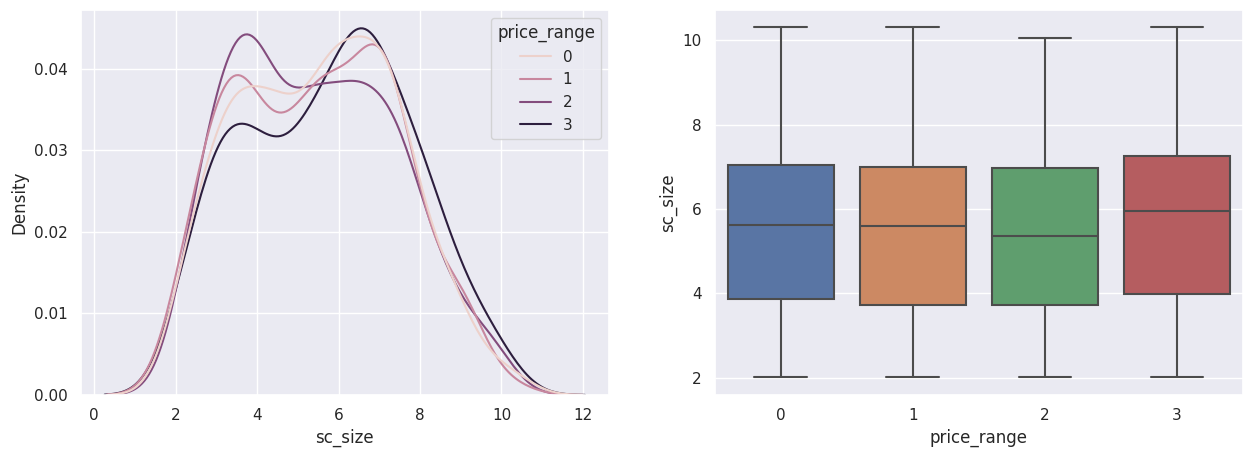

In [192]:

fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])
plt.show()

#####  What is/are the insight(s) found from the chart?

* Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

#### Chart - 11

`four_g & three_g`

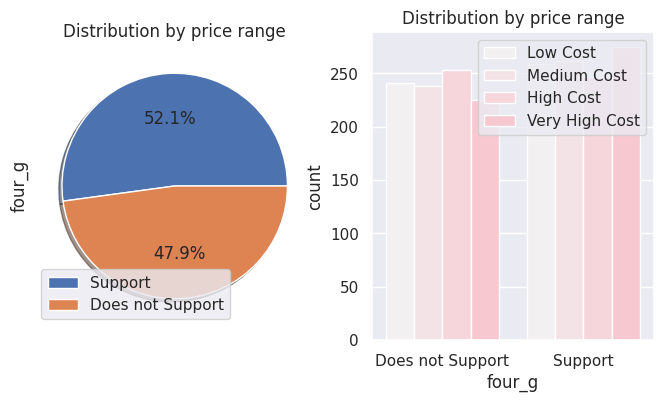

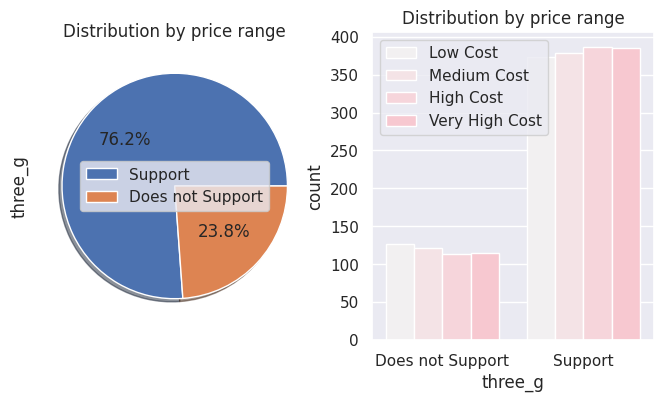

In [193]:
# Chart - 11 visualization code

binary_features = [ 'four_g', 'three_g']


# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (8, 4))

  df[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

#####  What is/are the insight(s) found from the chart?

* feature 'three_g' play an important feature in prediction



#### Chart - 12 - Correlation Heatmap

<Axes: >

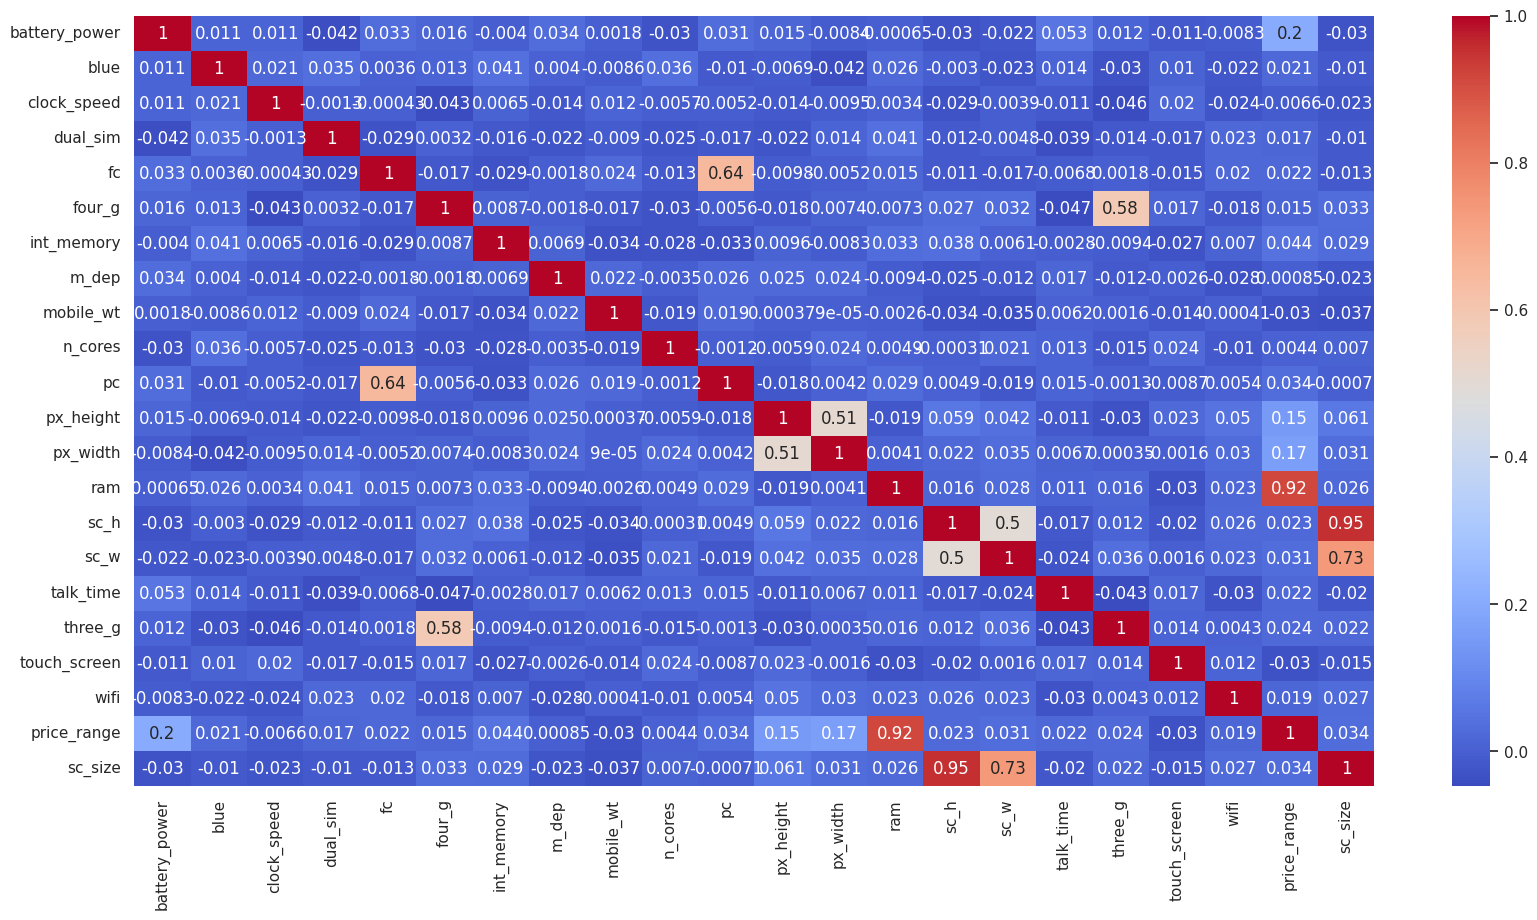

In [194]:
# Correlation Heatmap visualization code

corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')

#####  What is/are the insight(s) found from the chart?

## Observations:
* RAM has strong positive correlation with the Price_range and we know that Mobiles with high RAM are very costly. Thus RAM increases price range also increase.
* Battery_power also has positive correlation with the price range.Generally mobiles having high prices comes with good battery power.
* Also px_height and px_width (Pixel Resolution Height and width) are positively correlated. Generally High price range mobiles have good resolutions.

* Four_g and Three_g are highly positvely correlated. Nowdays most of the smart mobiles has both type of options. This could be the reason that they are correlated.

* primary camera i.e pc and front camera fc are positively correlated.
* sc_h and sc_w are positively correlated.

#### Chart - 15

##Univariate Analysis of Categorical columns

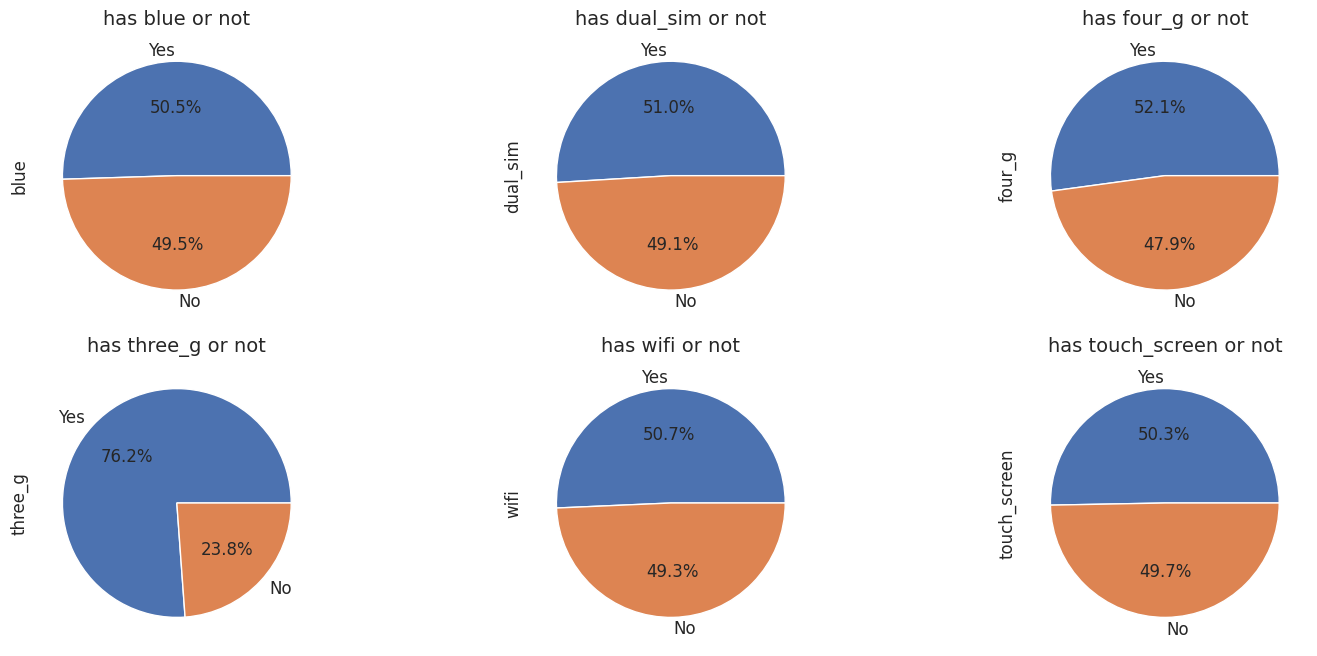

In [195]:
#  visualization

# Plotting the piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

rows=3
col=3
count=1
var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in var_list:
  plt.subplot(rows,col,count)
  df[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=12,labels=labels)
  plt.title(f'has {var} or not',fontsize=14)
  plt.tight_layout()
  count=count+1

##### 1. Why did you pick the specific chart?

##Univariate Analysis of Categorical columns
While 'uni' means one, variate indicates a variable. Therefore, univariate analysis is a form of analysis that only involves a single variable. In a practical setting, a univariate analysis means the analysis of a single variable (or column) in a dataset (data table).

##### 2. What is/are the insight(s) found from the chart?

* 1 means it has the specifications.
* 0 means it do not have the specifications.
* Percentage Distribution of Mobiles having bluetooth,dual sim, 4G,wifi and touchscreen are almost 50 %.
* Very few mobiles(23.8%) do not have Three_g.

In [196]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range', 'sc_size'],
      dtype='object')

### Chart -14

### `price_range`

In [197]:
# lets have look at our target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

Wow.!  we have equal number of obseravtions for each category. Thus we don't have imbalanced target variable.Accuracy score will be the best evalaution metric for us to select the model.

This is the target variable with value of
* 0=low cost
* 1=medium cost
* 2=high cost
* 3=very high cost

<Axes: ylabel='price_range'>

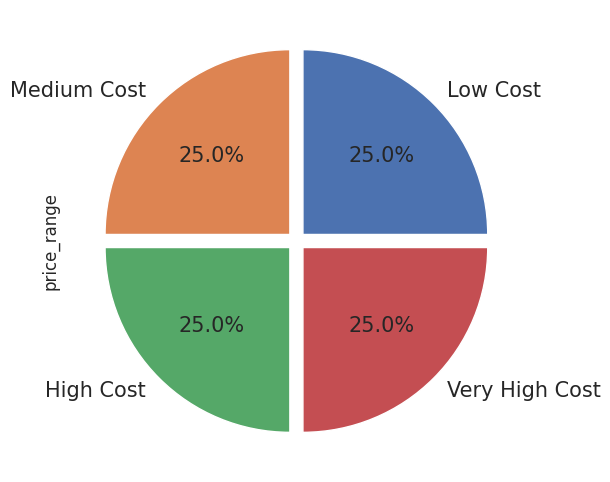

In [198]:
# Visualizing the Target variable's class distribution.

labels = ["Low Cost", "Medium Cost", "High Cost", "Very High Cost"]
price_range_values.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.1f%%',figsize=(10,6),fontsize=15)

Observation:-

* There are mobile phones in 4 price ranges. The number of elements is almost similar.

# Predictive Modeling:
Algorithms used for predictive modeling:
* 1) Logistic Regression
* 2) Random Forest Classifier
* 3) Decision tree
* 4) XG Boost Classifier


##Train Test split for regression

In [199]:
# Defining X and y
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [200]:
X.shape, y.shape

((2000, 21), (2000,))

### Scaling  using MinmaxScalar method

In [201]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [202]:
# Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

## ***7. ML Model Implementation***

### ML Model - 1

##Logistic Regression
Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [213]:
# ML Model - 1 Implementation

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

In [214]:
# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [215]:
# Evaluation metrics for test

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.95      0.91      0.92        95
           2       0.84      0.92      0.88        84
           3       0.97      0.95      0.96       115

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



[[105   0   0   0]
 [  1  86   4   0]
 [  0   9  77   6]
 [  0   0   3 109]]


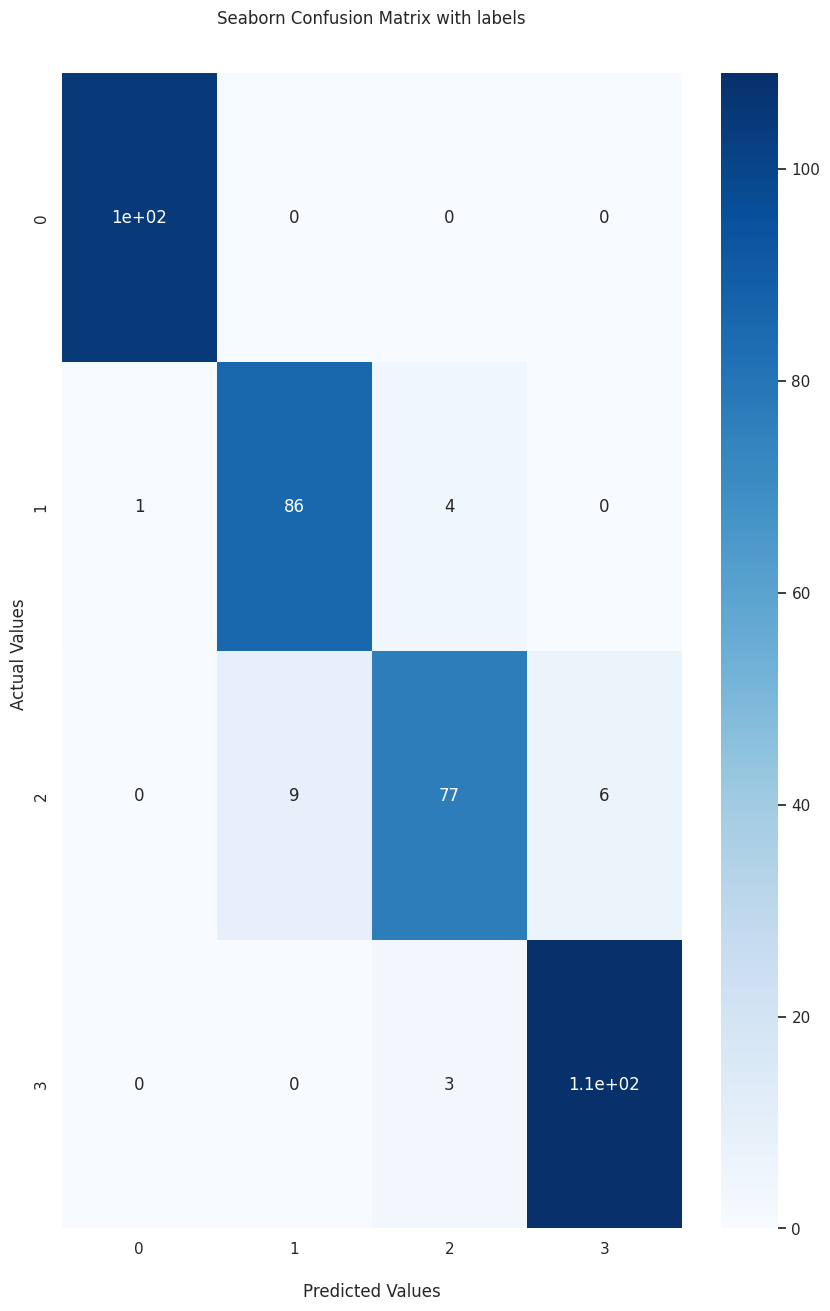

In [216]:
# Visualizing evaluation Metric Score chart

import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [217]:
# Evaluation metrics for train data

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       406
           1       0.90      0.92      0.91       403
           2       0.90      0.93      0.91       393
           3       0.98      0.95      0.96       398

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



## `Observations of Logistic Regression:`
* Test accuarcy = 94%
* Training accuarcy = 94%



### ML Model - 2

##Random Forest Classifier
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees.

In [218]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [219]:
from sklearn.ensemble import RandomForestClassifier
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [220]:
y_pred = clsr.predict(X_test)
test_score= accuracy_score(y_test, y_pred)
test_score

0.8775

In [221]:
y_pred_train = clsr.predict(X_train)
train_score = accuracy_score(y_train, y_pred_train)
train_score

1.0

In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.87      0.86      0.86        91
           2       0.76      0.85      0.80        92
           3       0.94      0.84      0.89       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [206]:
# Visualizing evaluation Metric Score chart

print(classification_report(y_test, y_pred))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [223]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.461248
1,battery_power,0.070673
2,px_height,0.055335
3,px_width,0.054247
4,mobile_wt,0.039753


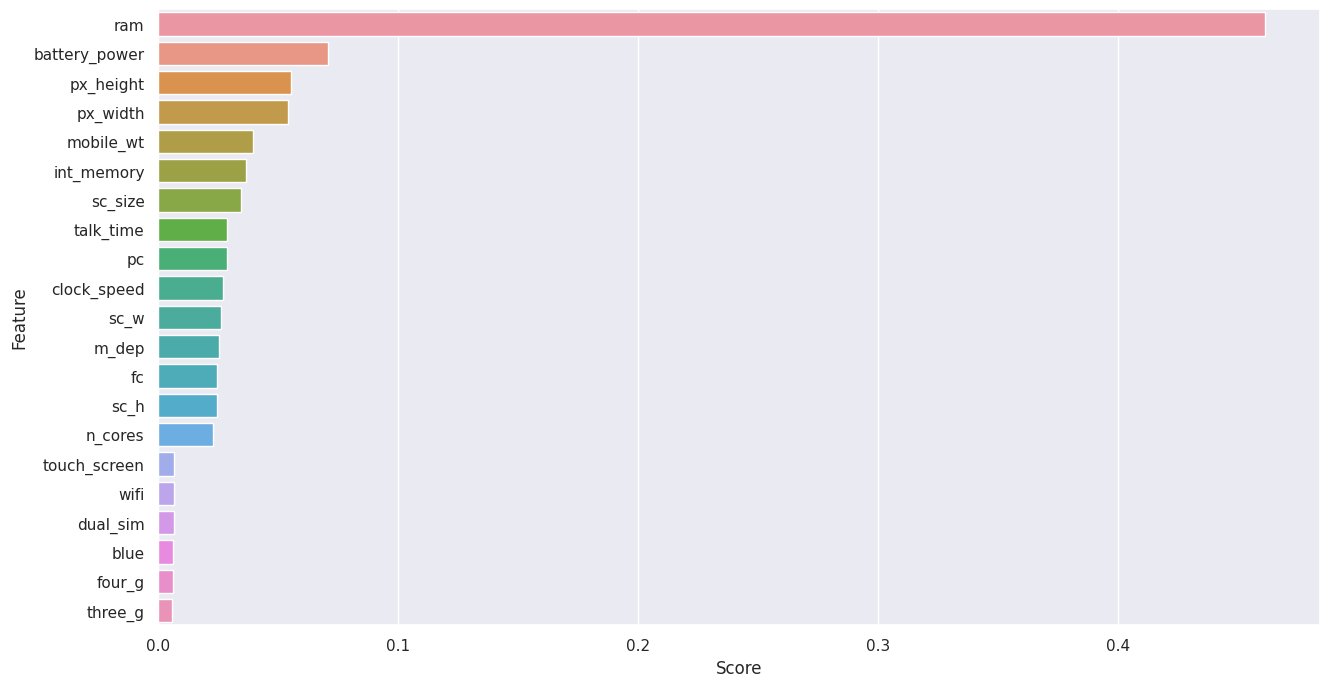

In [224]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [225]:
# Hyperparameter tuning of randomForest

from sklearn.model_selection import GridSearchCV
params = {'n_estimators':[10,50,100,200],
          'max_depth':[10,20,30,40],
           'min_samples_split':[2,4,6],
          'max_features':['sqrt',4,'log2','auto'],
          'max_leaf_nodes':[10, 20, 40]
          }
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=3)
clsr.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [226]:
clsr.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': 40,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
clsr.best_estimator_

In [228]:
clsr.best_score_

0.865495930713322

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features='log2', max_leaf_nodes=40,
                       min_samples_split=4, n_estimators=200)

In [230]:
y_pred = clsr.predict(X_test)
accuracy_score(y_test, y_pred)

0.86

In [231]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       105
           1       0.84      0.80      0.82        91
           2       0.76      0.77      0.77        92
           3       0.90      0.88      0.89       112

    accuracy                           0.86       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.86      0.86       400



[[101   4   0   0]
 [  9  73   9   0]
 [  0  10  71  11]
 [  0   0  13  99]]


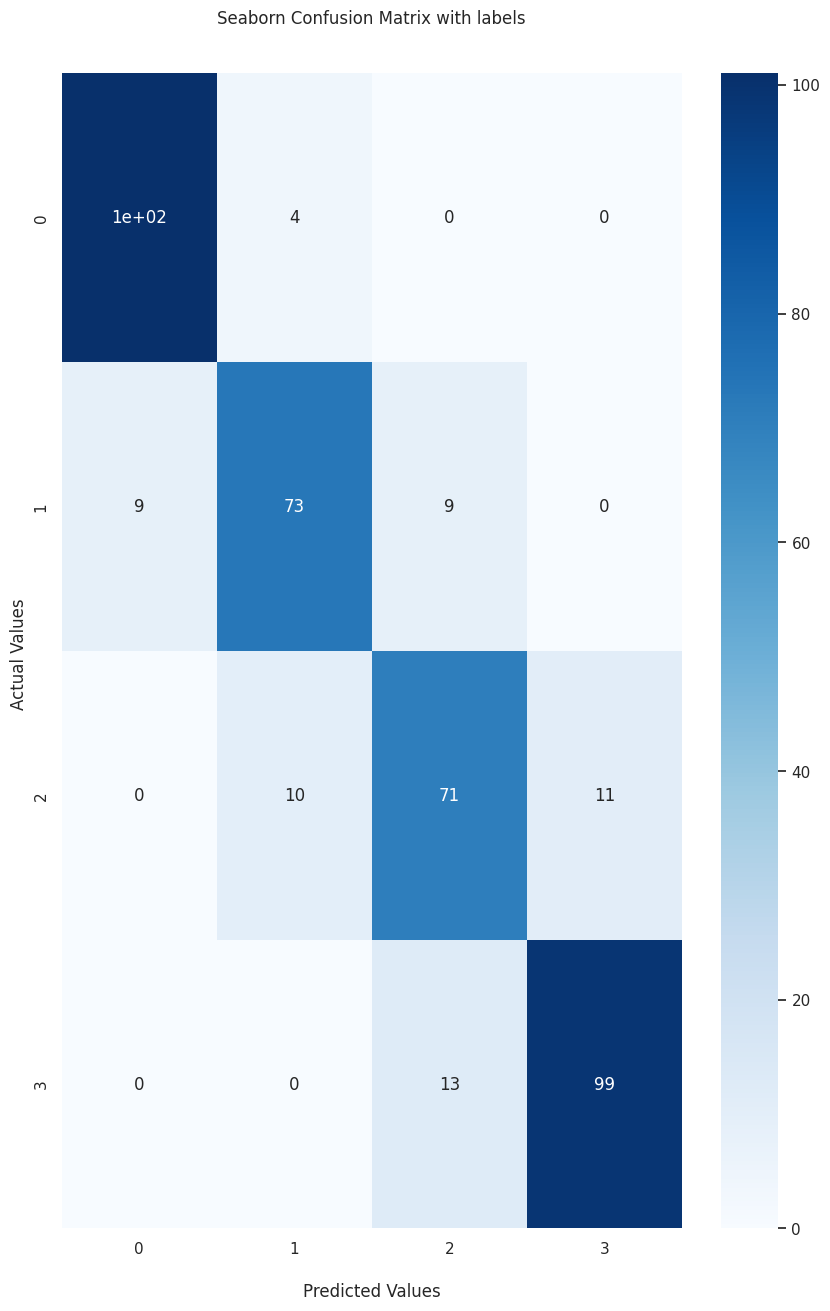

In [232]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [233]:
y_pred = clsr.predict(X_train)
accuracy_score(y_train, y_pred)

0.94875

In [234]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       395
           1       0.93      0.92      0.92       409
           2       0.93      0.93      0.93       408
           3       0.98      0.97      0.98       388

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [235]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.663679
1,battery_power,0.066870
2,px_height,0.045949
3,px_width,0.040404
4,int_memory,0.024584


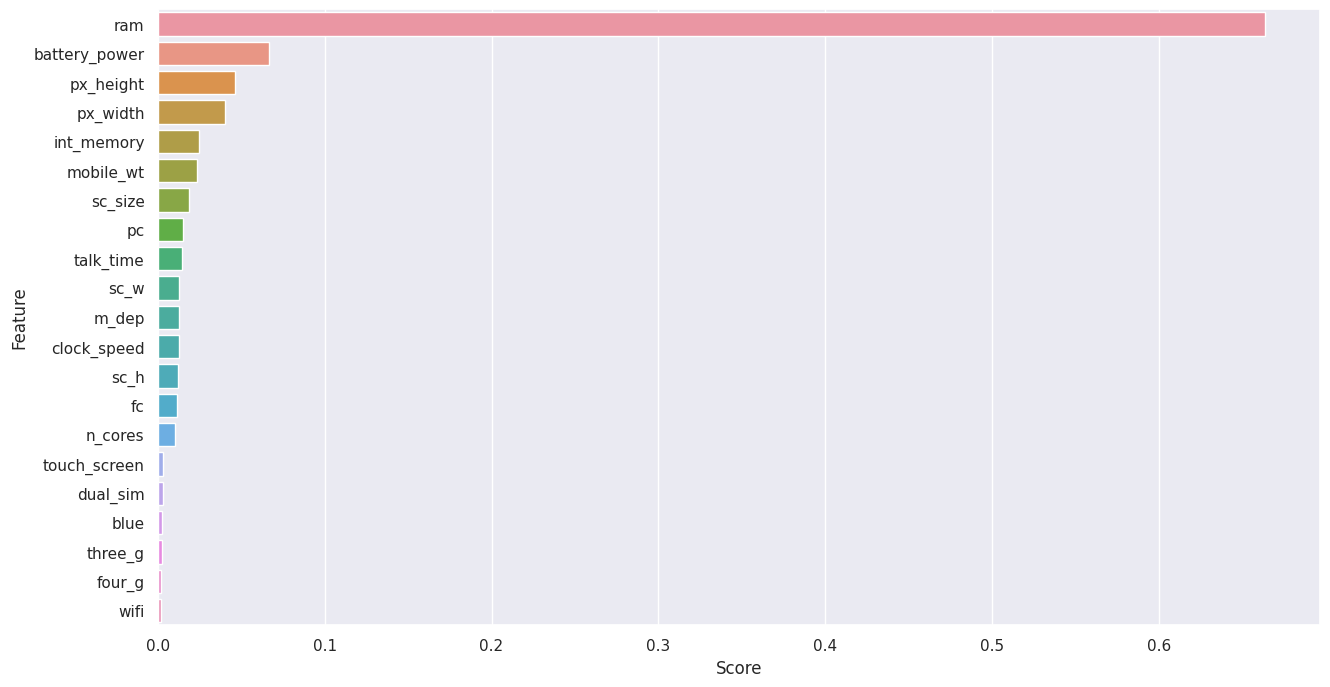

In [236]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

### `Observations of Random Forest:`
Before Tuning
* Training accuarcy = 100%
* Test accuarcy = 88%

Model is overfitted the data and does not generalised well. So we tuned the hyperparameters.

After tuning:
* Training accuarcy= 95%
* Test accuarcy = 87%

we have slightly improved the model and overfitting is reduced slightly.

### ML Model - 3

##Decision tree
Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [208]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [209]:
# Visualizing evaluation Metric Score chart

In [210]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [211]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [212]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***